In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_labels=tf.one_hot(train_labels,depth=10).numpy()
test_labels=tf.one_hot(test_labels,depth=10).numpy()

train_images=train_images/255.0
test_images=test_images/255.0

In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=64,kernel_initializer='normal',activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=32,kernel_initializer='normal',activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [20]:
train_epochs=5
batch_size=50
model_history=model.fit(train_images,train_labels,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)

Epoch 1/5
960/960 - 2s - loss: 0.3953 - accuracy: 0.8866 - val_loss: 0.2142 - val_accuracy: 0.9375 - 2s/epoch - 2ms/step
Epoch 2/5
960/960 - 1s - loss: 0.1735 - accuracy: 0.9490 - val_loss: 0.1489 - val_accuracy: 0.9552 - 1s/epoch - 1ms/step
Epoch 3/5
960/960 - 1s - loss: 0.1285 - accuracy: 0.9616 - val_loss: 0.1305 - val_accuracy: 0.9625 - 1s/epoch - 1ms/step
Epoch 4/5
960/960 - 1s - loss: 0.1009 - accuracy: 0.9698 - val_loss: 0.1286 - val_accuracy: 0.9612 - 1s/epoch - 1ms/step
Epoch 5/5
960/960 - 1s - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.1060 - val_accuracy: 0.9697 - 1s/epoch - 1ms/step


In [21]:
model_history.history

{'loss': [0.39531248807907104,
  0.17350634932518005,
  0.1284979283809662,
  0.10093897581100464,
  0.08440463989973068],
 'accuracy': [0.8866041898727417,
  0.9490000009536743,
  0.9615833163261414,
  0.9698333144187927,
  0.9743958115577698],
 'val_loss': [0.21422800421714783,
  0.14894606173038483,
  0.13049854338169098,
  0.12864196300506592,
  0.1060224175453186],
 'val_accuracy': [0.9375,
  0.9551666378974915,
  0.9624999761581421,
  0.9611666798591614,
  0.9696666598320007]}

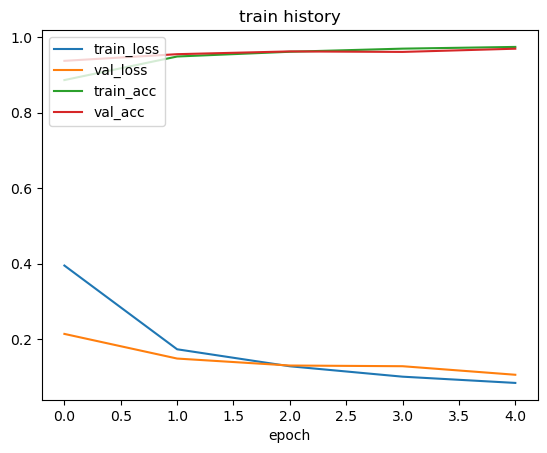

In [22]:
def show_train_history(model_history,train_loss,val_loss,train_acc,val_acc):
    plt.plot(model_history.history[train_loss])
    plt.plot(model_history.history[val_loss])
    plt.plot(model_history.history[train_acc])
    plt.plot(model_history.history[val_acc])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.legend(['train_loss','val_loss','train_acc','val_acc'],loc='upper left')
    plt.show()

show_train_history(model_history,'loss','val_loss','accuracy','val_accuracy')

In [23]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
test_pred=model.predict(test_images)
test_pred.shape

313/313 - 0s - loss: 0.0973 - accuracy: 0.9712 - 321ms/epoch - 1ms/step
313/313 [==============================] - 0s 694us/step


(10000, 10)